In [1]:
from torch.utils.data import Dataset, DataLoader

In [2]:
import pandas as pd

df_train = pd.read_csv('fairface_label_train.csv')
df_valid = pd.read_csv('fairface_label_val.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fairface_label_train.csv'

In [23]:
df= df[df['race'] == 'East Asian']

In [24]:
df = df[df.age.isin(['50-59', '20-29', '10-19', '60-69', '30-39', 'more than 70', '40-49'])]

In [25]:
df.age.value_counts()

20-29           4765
30-39           2382
10-19           1176
40-49            939
50-59            524
60-69            270
more than 70      87
Name: age, dtype: int64

In [26]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})

In [27]:
df['age'] = df['age'].map({'50-59':1, '20-29':0, '10-19':0, '60-69':2, '30-39':1, 'more than 70':2, '40-49':1})

In [28]:
del df['race']
del df['service_test']

In [29]:
df['path'] = df['file'].apply(lambda s : '/opt/ml/input/ext_data/fairface/' + s)

In [30]:
del df['file']

In [10]:
from PIL import Image

In [11]:
img = Image.open(df['path'].iloc[1256])

In [12]:
import numpy as np

In [13]:
np.array(img).shape

(448, 448, 3)

In [31]:
df.to_csv('/opt/ml/code/df/df_ff_all_race.csv', index=False)

In [15]:
from augmentation import RandAugment, Cutout
from torchvision import transforms

transform_train = transforms.Compose([
                RandAugment(),
                transforms.CenterCrop(400),
                transforms.Resize(224),
                transforms.RandomHorizontalFlip(),
                Cutout(size=100),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [16]:
class FFDataset(Dataset):
    
    def __init__(self, df, transform, target='age'):
        self.df = df
        self.target = target
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['path']
        label = self.df.iloc[idx][self.target]
        img = Image.open(img_path)
        img = self.transform(img)
        return img, label

In [17]:
ds = FFDataset(df, transform_train)

In [18]:
dl = DataLoader(ds, shuffle=True, batch_size=16)

In [19]:
# check input train batch
a = iter(dl)

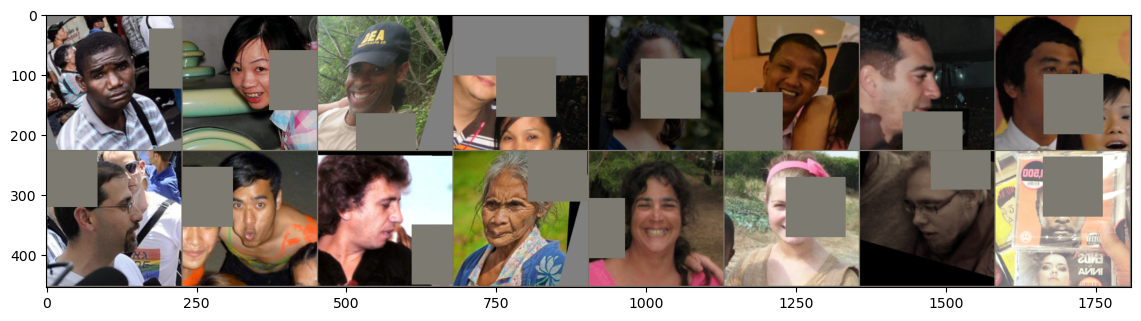

tensor([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1])


In [20]:
from utils import imshow
batch = next(a)
imshow(batch[0])
print(batch[1])